# DXY and FX Scatterplot

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
os.getcwd()

'c:\\Users\\libeikon\\Desktop\\refinitiv_scrape\\econometrics\\econometrics2024\\project\\code'

In [4]:
# Import fx data:

fx_data_filepath = "data\subset_pgi_fx_data.csv"
fx_data = pd.read_csv(fx_data_filepath)

# set 'date'
fx_data['date'] = pd.to_datetime(fx_data['date'])
fx_data.set_index('date', inplace=True)
# set other columns to numeric
fx_data = fx_data.apply(pd.to_numeric, errors='coerce')
fx_data.dropna()

# Import dxy data
dxy_data_filepath = "data\dxy.csv"
dxy_data = pd.read_csv(dxy_data_filepath)
dxy_data

# drop 1st row
dxy_data = dxy_data.drop(0)
dxy_data.columns = ['Date', 'DXY']
# set col idx 0 as index, convert to datetime
dxy_data['Date'] = pd.to_datetime(dxy_data['Date'])
dxy_data.set_index('Date', inplace=True)
dxy_data['DXY'] = pd.to_numeric(dxy_data['DXY'])
dxy_data.dropna()
# sort by data in descending order
dxy_data = dxy_data.sort_index(ascending=True)

# concat to one dataframe
fx_dxy_data = pd.concat([fx_data, dxy_data], axis=1)
fx_dxy_data.dropna(how='any', inplace=True)
fx_dxy_data

C:\Users\libeikon\AppData\Local\Temp\ipykernel_19664\1028153000.py:22: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dxy_data['Date'] = pd.to_datetime(dxy_data['Date'])


,EUR,JPY,GBP,AUD,CAD,CHF,CNY,HKD,SEK,NOK,SGD,NZD,KRW,MXN,RUB,INR,BRL,PLN,DKK,DXY
2000-01-03,0.980273,101.697917,0.614647,1.517177,1.445373,1.577484,8.274900,7.784310,8.451578,7.981980,1.658627,1.909349,1128.189927,9.462932,27.605723,43.532065,1.809771,4.146184,7.359122,100.220
2000-01-04,0.970565,103.030563,0.610927,1.523549,1.450996,1.557497,8.274950,7.779872,8.365699,7.916581,1.652515,1.919317,1122.965813,9.474138,27.562277,43.532065,1.829093,4.116739,7.218940,100.410
2000-01-05,0.967954,103.911801,0.609433,1.522315,1.450960,1.552237,8.274900,7.777034,8.347592,7.920934,1.655674,1.928254,1134.895485,9.535579,27.179507,43.532065,1.847602,4.111400,7.188352,100.380
2000-01-06,0.968553,105.083968,0.606829,1.526166,1.456225,1.549882,8.274850,7.780014,8.347016,7.910416,1.664535,1.937610,1147.428345,9.583633,27.580348,43.532065,1.840592,4.100212,7.180229,100.650
2000-01-07,0.972220,105.163441,0.609844,1.527729,1.455932,1.563685,8.274700,7.779771,8.413414,7.969577,1.662132,1.937378,1137.337090,9.537637,27.393553,43.532065,1.834543,4.073998,7.237125,100.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-20,0.936362,131.829000,0.820336,1.494627,1.371665,0.925421,6.897700,7.847950,10.487423,10.696865,1.341458,1.598862,1312.108554,18.954970,76.859990,82.487800,5.276400,4.403576,6.969916,103.281
2023-03-21,0.933202,131.244889,0.815675,1.494473,1.368687,0.929709,6.874433,7.839733,10.401940,10.672199,1.338645,1.609265,1309.206997,18.858913,77.250004,82.655495,5.237500,4.393467,6.946677,103.256
2023-03-22,0.928288,132.422636,0.817735,1.493475,1.370344,0.922565,6.887700,7.847850,10.330417,10.539230,1.336565,1.611710,1307.634490,18.612834,76.998998,82.648796,5.242700,4.347817,6.912347,102.346
2023-03-23,0.917039,130.785667,0.811390,1.484752,1.367088,0.915668,6.822900,7.849255,10.249220,10.395500,1.324600,1.592260,1282.436340,18.504050,76.925016,82.181747,5.237100,4.293047,6.828233,102.532


In [5]:
# Transform to log returns
fx_log_returns = np.log(fx_dxy_data/fx_dxy_data.shift(1))
fx_log_returns.dropna(how='any', inplace=True)

# Multiply by 100 to get percentage
fx_approx_percent_returns = fx_log_returns * 100
fx_approx_percent_returns


# write fx_approx_percent_returns to csv
fx_approx_percent_returns.to_csv('fx_data_approx_percent_returns.csv')

# Plot scatterplot against dxy

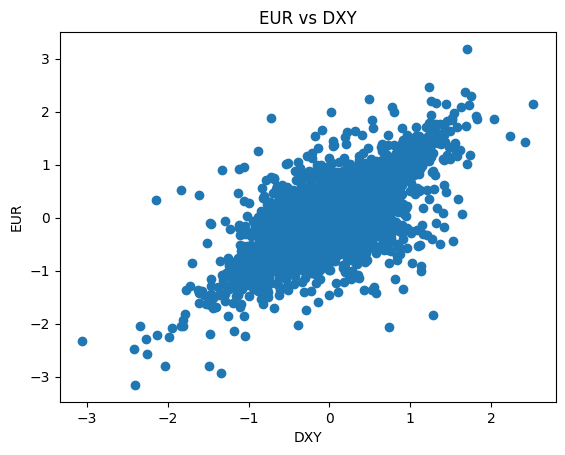

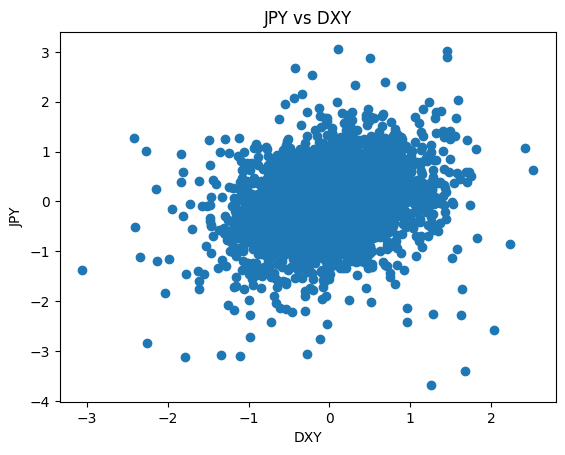

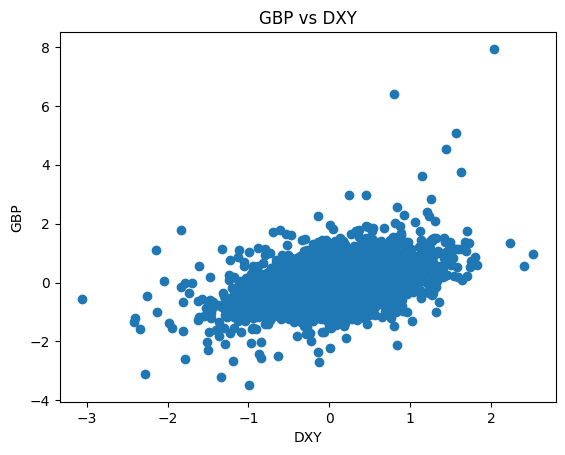

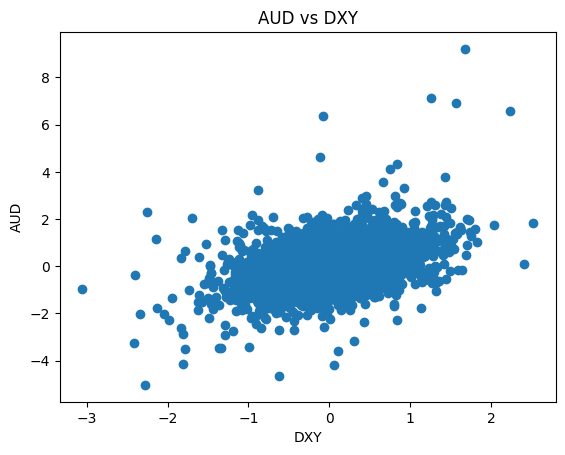

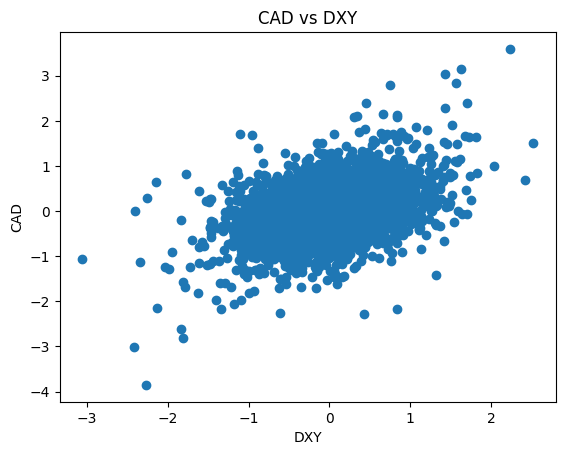

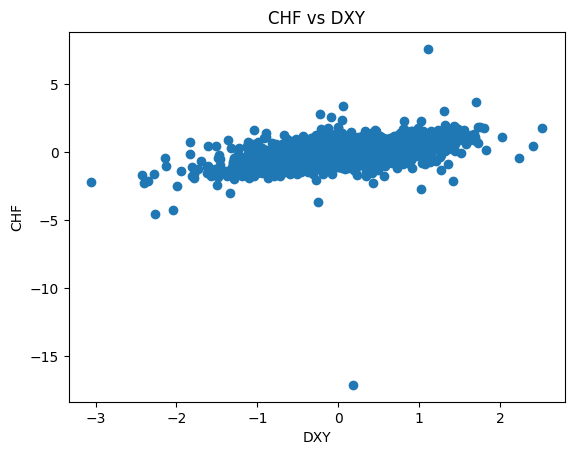

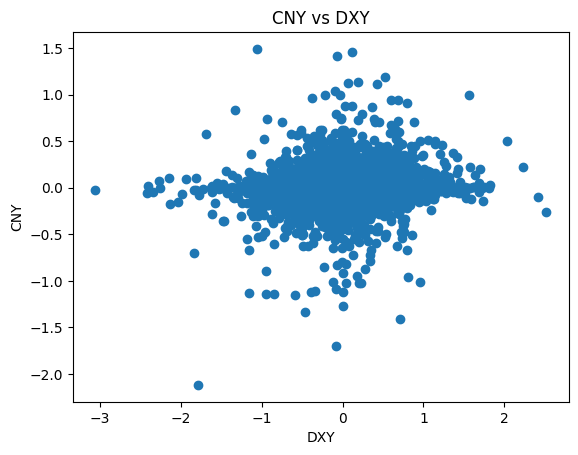

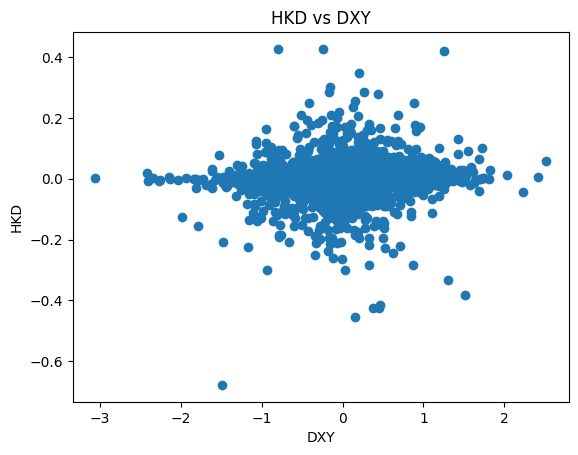

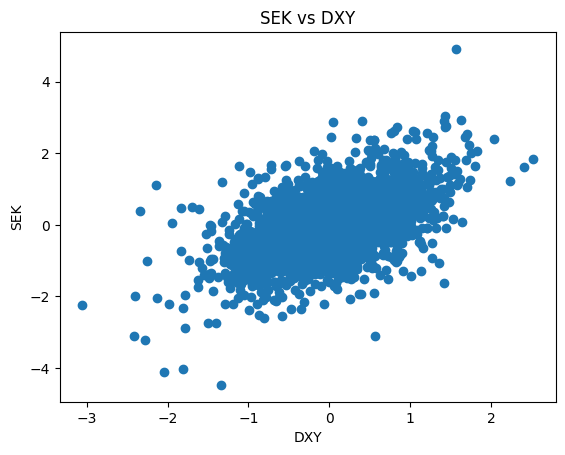

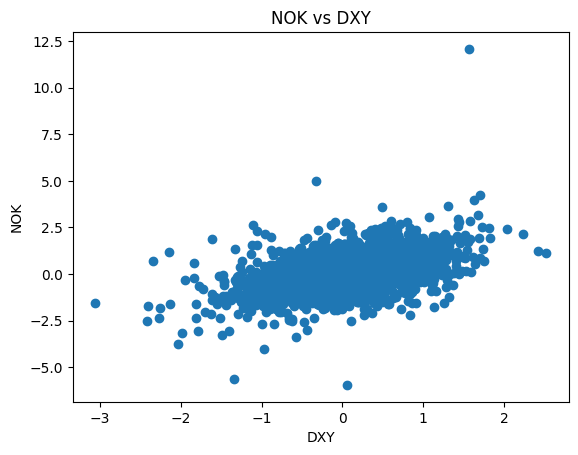

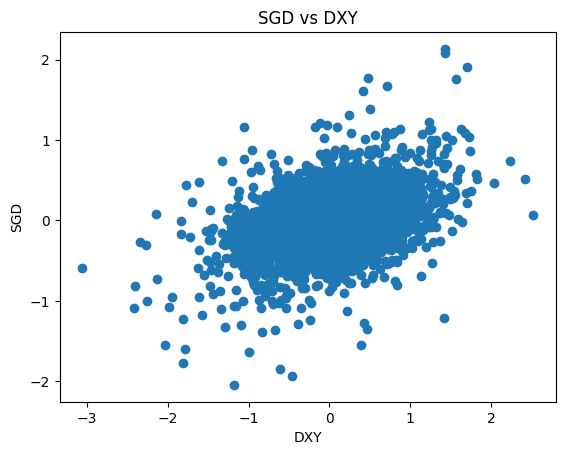

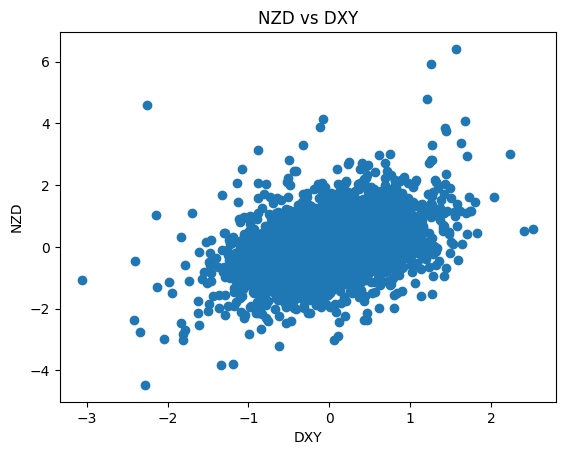

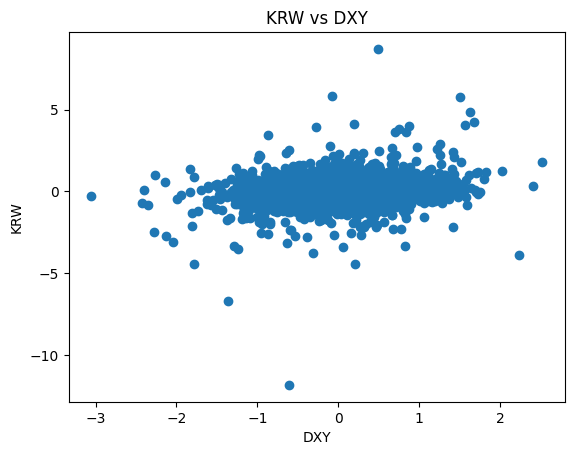

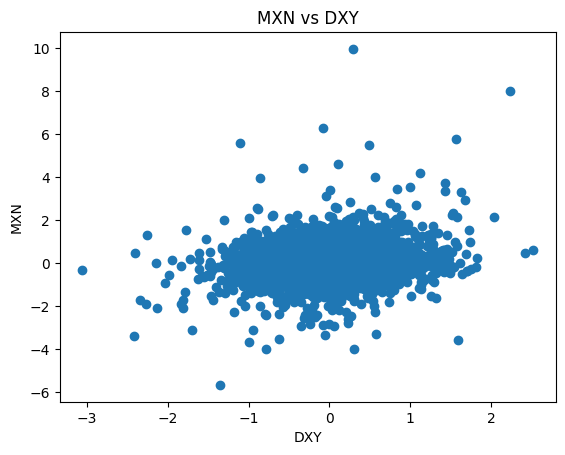

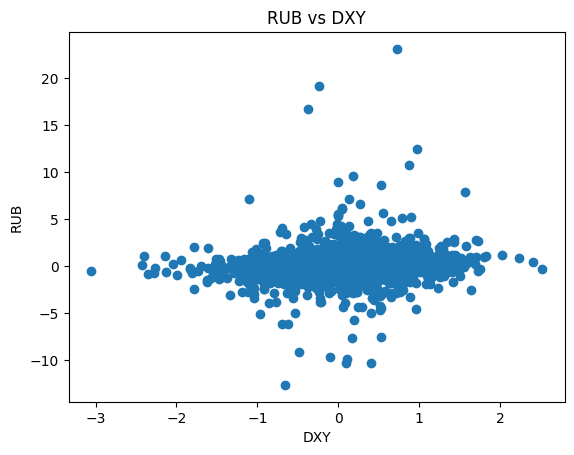

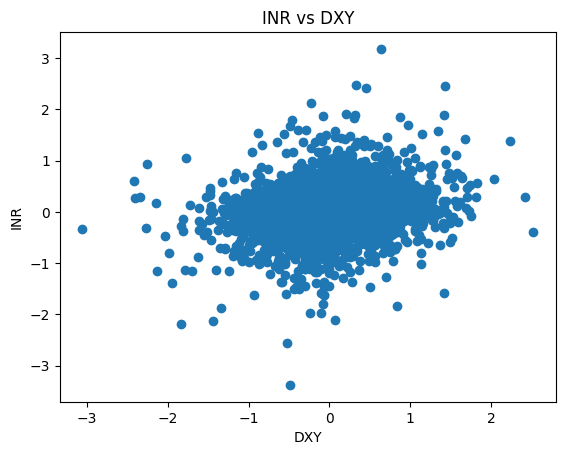

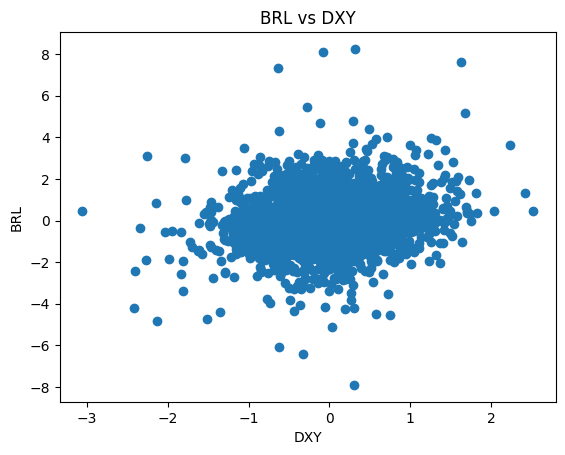

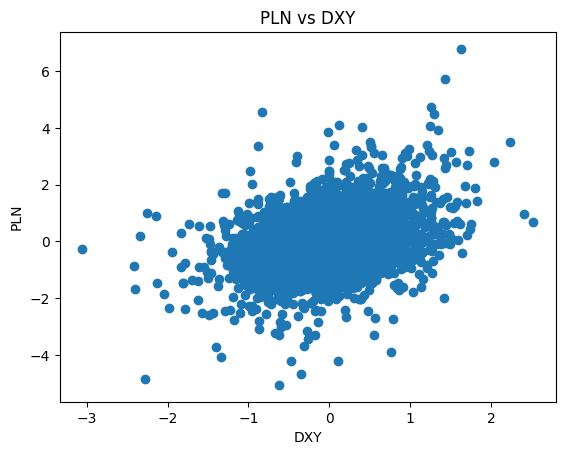

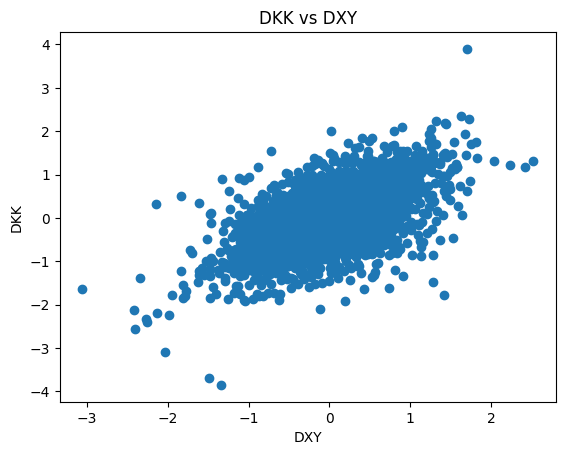

In [6]:
# For each col excluding dxy, plot scatter with dxy on x-axis

for col in fx_approx_percent_returns.columns:
    if col != 'DXY':
        plt.scatter(fx_approx_percent_returns['DXY'], fx_approx_percent_returns[col])
        plt.xlabel('DXY')
        plt.ylabel(col)
        plt.title(f'{col} vs DXY')
        plt.show()

# Covariance Matrix of Currency Returns

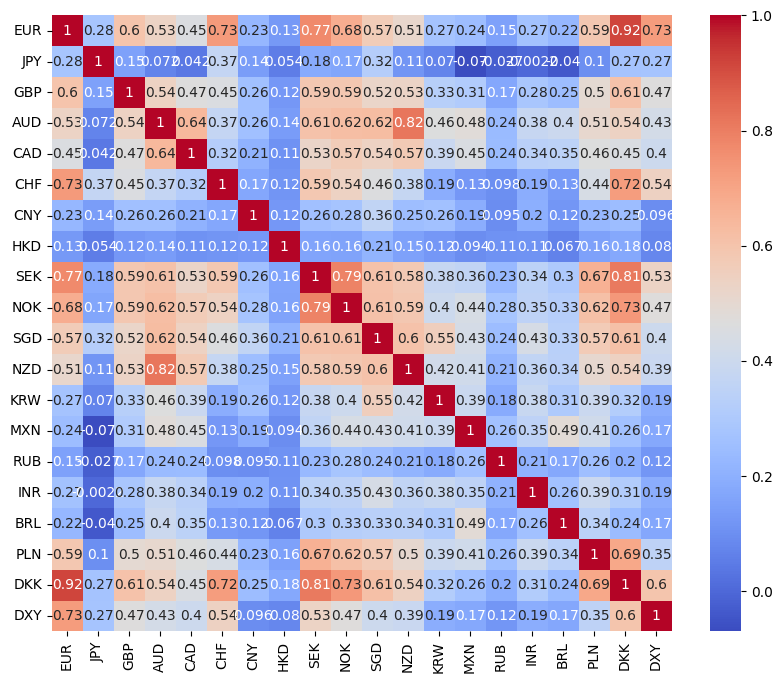

In [7]:
# Estimate correlation matrix between all currency pairs
import seaborn as sns


corr_matrix = fx_approx_percent_returns.corr()
corr_matrix

# Display heatmap
# sns.heatmap(corr_matrix, annot=True)
# make the plot bigger and easier to read
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Regression Comparison: AR(1) vs. AR(1) + DXY

In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Assuming fx_approx_percent_returns is your DataFrame containing the series

# Get the lagged values for each column
lagged_values = fx_approx_percent_returns.shift(1)

# Drop rows with NaN values introduced by the shift operation
lagged_values.dropna(inplace=True)

# Get the original series corresponding to the lagged values
original_series = fx_approx_percent_returns.loc[lagged_values.index]

# Add a constant term to the lagged values
X = sm.add_constant(lagged_values)

# Fit the OLS model
results = []
for column in original_series.columns:
    # Get the corresponding original series for the current column
    Y = original_series[column]
    
    # Fit the model for the current series
    model = sm.OLS(Y, X)
    result = model.fit()
    results.append(result)

# Display summary for each series
for i, result in enumerate(results):
    print(f"Summary for series {i+1}:")
    print(result.summary())
    print("\n")


Summary for series 1:
                            OLS Regression Results                            
Dep. Variable:                    EUR   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     48.07
Date:                Thu, 02 May 2024   Prob (F-statistic):          2.65e-176
Time:                        18:52:43   Log-Likelihood:                -4502.2
No. Observations:                5998   AIC:                             9046.
Df Residuals:                    5977   BIC:                             9187.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.0